In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import math
from scipy import stats
from scipy.stats import poisson
import scipy.special as sc
from scipy.stats import binom
'''import pymc3 as pm
from theano import tensor as T'''
%matplotlib inline

Poisson Distribution

- kemungkinan customer datang per hari

In [2]:
# kemungkinan 25 customer datang per hari
average_arrival_rate = 18
poisson_prob_arrival = math.exp(-average_arrival_rate) * (average_arrival_rate**25) / math.factorial(25)
print('probability of  customers arriving per day is %2.2f %%' %(poisson_prob_arrival*100))

probability of  customers arriving per day is 2.37 %


Text(0.5, 1.0, 'Kemungkinan customer datang rata - rata per hari')

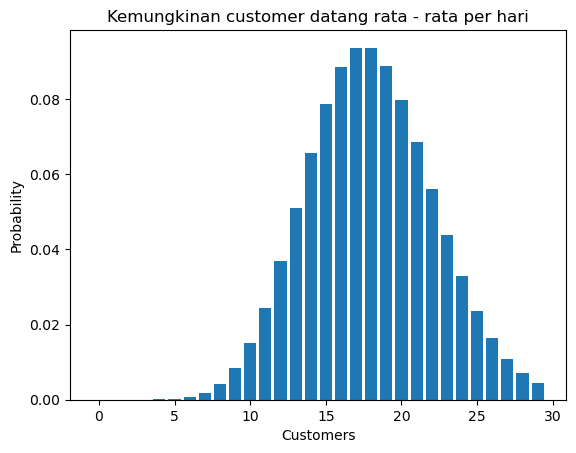

In [3]:
k_arrival = np.arange(30)
lamb_arrival = 18
pois_arrival = poisson.pmf(k_arrival,lamb_arrival)
plt.bar(k_arrival,pois_arrival)
plt.xlabel('Customers')
plt.ylabel('Probability')
plt.title('Kemungkinan customer datang rata - rata per hari')

In [4]:
k_arrival2,mu_arrival2 = 18,18

prob_up_to_eighteen = poisson.cdf(k_arrival2,mu_arrival2)
prob_more_than_eighteen = 1 - prob_up_to_eighteen
print('The probability that 18 or less customers show up is %2.1f %%.' %(100*prob_up_to_eighteen))
print('The probability that more than eighteen customers show up during lunch rush is %2.1f %%.' %(100*prob_more_than_eighteen))

The probability that 18 or less customers show up is 56.2 %.
The probability that more than eighteen customers show up during lunch rush is 43.8 %.


Bayes Theorem

- invoice mana yg kemungkinan sudah terbayarkan (lebih cocok pakai logistik regression)

In [6]:
#invoice mana yg kemungkinan sudah terbayarkan
start_row = 17  # Start row (excluding header)
end_row = 32  # End row
start_col = 'C'  # Start column
end_col = 'E'
df_invoice = pd.read_excel('03. LAPORAN HARIAN MEI 2023.xlsx', sheet_name='27 MEI 2023', skiprows=start_row-1, usecols=f'{start_col}:{end_col}', nrows=end_row-start_row+1)
df_invoice

,NAMA PELANGGAN,NO FAKTUR,INVOICE
0,CV. PAGANTI JAYA ALKES,SI.2023.05.00204,455000
1,APOTEK SHAFANA,SI.2023.05.00205,117500
2,APOTEK RAFIZIY,SI.2023.05.00206,30000
3,APOTEK BINA SUKSES MANDIRI,SI.2023.05.00207,84000
4,APOTEK YEKANA,SI.2023.05.00208,150000
5,APOTEK FAREL FARMA,SI.2023.05.00209,100000
6,APOTEK AKASIA,SI.2023.05.00210,77000
7,APOTEK RIZKI PRATAMA (DMI),SI.2023.05.00211,120000
8,APOTEK ADINDA BARU,SI.2023.05.00212,240000
9,APOTEK DERI FARMA,SI.2023.05.00213,396000


In [7]:
def pembayaran_invoice(invoice):
    if invoice < 100000:
        return 'lunas'
    else:
        return 'belum lunas'

df_invoice['status_invoice'] = df_invoice['INVOICE'].apply(pembayaran_invoice)
df_invoice

,NAMA PELANGGAN,NO FAKTUR,INVOICE,status_invoice
0,CV. PAGANTI JAYA ALKES,SI.2023.05.00204,455000,belum lunas
1,APOTEK SHAFANA,SI.2023.05.00205,117500,belum lunas
2,APOTEK RAFIZIY,SI.2023.05.00206,30000,lunas
3,APOTEK BINA SUKSES MANDIRI,SI.2023.05.00207,84000,lunas
4,APOTEK YEKANA,SI.2023.05.00208,150000,belum lunas
5,APOTEK FAREL FARMA,SI.2023.05.00209,100000,belum lunas
6,APOTEK AKASIA,SI.2023.05.00210,77000,lunas
7,APOTEK RIZKI PRATAMA (DMI),SI.2023.05.00211,120000,belum lunas
8,APOTEK ADINDA BARU,SI.2023.05.00212,240000,belum lunas
9,APOTEK DERI FARMA,SI.2023.05.00213,396000,belum lunas


In [8]:
def bool_invoice(status):
    if status == 'lunas':
        return 1
    else:
        return 0

df_invoice['bool_invoice'] = df_invoice['status_invoice'].apply(bool_invoice)
df_invoice

,NAMA PELANGGAN,NO FAKTUR,INVOICE,status_invoice,bool_invoice
0,CV. PAGANTI JAYA ALKES,SI.2023.05.00204,455000,belum lunas,0
1,APOTEK SHAFANA,SI.2023.05.00205,117500,belum lunas,0
2,APOTEK RAFIZIY,SI.2023.05.00206,30000,lunas,1
3,APOTEK BINA SUKSES MANDIRI,SI.2023.05.00207,84000,lunas,1
4,APOTEK YEKANA,SI.2023.05.00208,150000,belum lunas,0
5,APOTEK FAREL FARMA,SI.2023.05.00209,100000,belum lunas,0
6,APOTEK AKASIA,SI.2023.05.00210,77000,lunas,1
7,APOTEK RIZKI PRATAMA (DMI),SI.2023.05.00211,120000,belum lunas,0
8,APOTEK ADINDA BARU,SI.2023.05.00212,240000,belum lunas,0
9,APOTEK DERI FARMA,SI.2023.05.00213,396000,belum lunas,0


In [9]:
total_invoice = len(df_invoice)
total_lunas = len(df_invoice[df_invoice['status_invoice'] == 'lunas'])
total_belum_lunas = len(df_invoice[df_invoice['status_invoice'] == 'belum lunas'])

word_lunas = len(df_invoice[(df_invoice['status_invoice'] == 'lunas') & (df_invoice['bool_invoice'] == 1)])
word_belum_lunas = len(df_invoice[(df_invoice['status_invoice'] == 'belum lunas') & (df_invoice['bool_invoice'] == 1)])
p_lunas = total_lunas / total_invoice
p_belum_lunas = total_belum_lunas / total_invoice
p_word_given_lunas = word_lunas / total_lunas
p_word_given_belum_lunas = word_belum_lunas / total_belum_lunas
p_lunas_given_word = (p_word_given_lunas * p_lunas) / ((p_word_given_lunas * p_lunas) + (p_word_given_belum_lunas * p_belum_lunas))
p_belum_lunas_given_word = (p_word_given_belum_lunas * p_belum_lunas) / ((p_word_given_lunas * p_lunas) + (p_word_given_belum_lunas * p_belum_lunas))

def classify_invoice(inv):
    if inv['bool_invoice'] == 1:
        if p_lunas_given_word > p_belum_lunas_given_word:
            return 'lunas'
        else:
            return 'belum lunas'
    else:
        return 'belum lunas'

df_invoice['predicted_invoice'] = df_invoice.apply(classify_invoice, axis=1)
df_invoice

,NAMA PELANGGAN,NO FAKTUR,INVOICE,status_invoice,bool_invoice,predicted_invoice
0,CV. PAGANTI JAYA ALKES,SI.2023.05.00204,455000,belum lunas,0,belum lunas
1,APOTEK SHAFANA,SI.2023.05.00205,117500,belum lunas,0,belum lunas
2,APOTEK RAFIZIY,SI.2023.05.00206,30000,lunas,1,lunas
3,APOTEK BINA SUKSES MANDIRI,SI.2023.05.00207,84000,lunas,1,lunas
4,APOTEK YEKANA,SI.2023.05.00208,150000,belum lunas,0,belum lunas
5,APOTEK FAREL FARMA,SI.2023.05.00209,100000,belum lunas,0,belum lunas
6,APOTEK AKASIA,SI.2023.05.00210,77000,lunas,1,lunas
7,APOTEK RIZKI PRATAMA (DMI),SI.2023.05.00211,120000,belum lunas,0,belum lunas
8,APOTEK ADINDA BARU,SI.2023.05.00212,240000,belum lunas,0,belum lunas
9,APOTEK DERI FARMA,SI.2023.05.00213,396000,belum lunas,0,belum lunas


In [10]:
accuracy_invoice = len(df_invoice[df_invoice['status_invoice'] == df_invoice['predicted_invoice']]) / total_invoice
print('accuracy: %.2f' %accuracy_invoice)
print('P(lunas|word):', p_lunas_given_word)
print('P(belum lunas|word):', p_belum_lunas_given_word)

accuracy: 1.00
P(lunas|word): 1.0
P(belum lunas|word): 0.0


In [11]:
bayes_df = DataFrame({
    'features1': [1, 0, 1, 0, 1],
    'features2': [1, 1, 0, 1, 0],
    'Label':['A', 'B', 'A', 'B', 'A']
})
bayes_df

,features1,features2,Label
0,1,1,A
1,0,1,B
2,1,0,A
3,0,1,B
4,1,0,A


In [12]:
total_samples = len(bayes_df)
p_A = len(bayes_df[bayes_df['Label'] == 'A']) / total_samples
p_B = len(bayes_df[bayes_df['Label'] == 'B']) / total_samples
p_features1_given_A = len(bayes_df[(bayes_df['features1'] == 1) & (bayes_df['Label'] == 'A')]) / len(bayes_df[bayes_df['Label'] == 'A'])
p_features2_given_A = len(bayes_df[(bayes_df['features2'] == 1) & (bayes_df['Label'] == 'A')]) / len(bayes_df[bayes_df['Label'] == 'A'])
p_A_given_Feature1_and_Feature2 = (p_features1_given_A * p_features2_given_A * p_A) / ((p_features1_given_A * p_features2_given_A * p_A) + ((1 - p_features1_given_A) * (1 - p_features2_given_A) * p_B))
print('P(A|Feature1, Feature2):', p_A_given_Feature1_and_Feature2)

P(A|Feature1, Feature2): 1.0


In [13]:
data_bayes = {'label': ['spam','ham','ham','ham','spam','spam','ham','spam','spam','spam','ham'],
             'contain_words': [1,10,15,21,100,37,33,29,1,42,11]}
df_bayes = DataFrame(data_bayes)
df_bayes

,label,contain_words
0,spam,1
1,ham,10
2,ham,15
3,ham,21
4,spam,100
5,spam,37
6,ham,33
7,spam,29
8,spam,1
9,spam,42


In [14]:
total_emails = len(df_bayes)
spam_emails = len(df_bayes[df_bayes['label'] == 'spam'])
ham_emails = len(df_bayes[df_bayes['label'] == 'ham' ])

word_occurance_spam = len(df_bayes[(df_bayes['label'] == 'spam') & (df_bayes['contain_words'] == 1)])
word_occurance_ham = len(df_bayes[(df_bayes['label'] == 'ham') & (df_bayes['contain_words'] == 1)])
p_spam = spam_emails / total_emails
p_ham = ham_emails / total_emails
p_word_given_spam = word_occurance_spam / spam_emails
p_word_given_ham = word_occurance_ham / ham_emails
p_spam_given_word = (p_word_given_spam * p_spam) / ((p_word_given_spam * p_spam) + (p_word_given_ham * p_ham))
p_ham_given_word = (p_word_given_ham * p_ham) / ((p_word_given_spam * p_spam) + (p_word_given_ham * p_ham))

def classify_email(email):
    if email['contain_words'] == 1:
        if p_spam_given_word > p_ham_given_word:
            return 'spam'
        else:
            return 'ham'
    else:
        return 'ham'

df_bayes['predicted_table'] = df_bayes.apply(classify_email, axis=1)
df_bayes

,label,contain_words,predicted_table
0,spam,1,spam
1,ham,10,ham
2,ham,15,ham
3,ham,21,ham
4,spam,100,ham
5,spam,37,ham
6,ham,33,ham
7,spam,29,ham
8,spam,1,spam
9,spam,42,ham


In [15]:
accuracy_spam_ham = len(df_bayes[df_bayes['label'] == df_bayes['predicted_table']]) / total_emails
print('accuracy: %.2f' %accuracy_spam_ham)
print('P(spam|word):', p_spam_given_word)
print('P(ham|word):', p_ham_given_word)

accuracy: 0.64
P(spam|word): 1.0
P(ham|word): 0.0


Beta Distribution

- diantara credit, bandingkan performa 2 pelanggan dalam kredit

In [16]:
total_debit_credit = pd.read_excel('laporan_mei_2023(6)_edit.xlsx',sheet_name='total_debit_credit',names=['Date','Debit','Credit'])
total_debit_credit

,Date,Debit,Credit
0,2023-05-02,5.920772e+07,4.102612e+08
1,2023-05-03,9.265000e+06,2.542550e+07
2,2023-05-04,3.150020e+07,4.361693e+07
3,2023-05-05,1.428500e+06,2.020470e+07
4,2023-05-06,4.608030e+07,4.971500e+06
5,2023-05-08,6.675464e+07,5.191140e+07
6,2023-05-09,2.132750e+07,2.809800e+07
7,2023-05-10,2.484460e+07,1.108892e+08
8,2023-05-11,3.712000e+06,3.259000e+07
9,2023-05-12,1.469000e+07,5.644500e+06


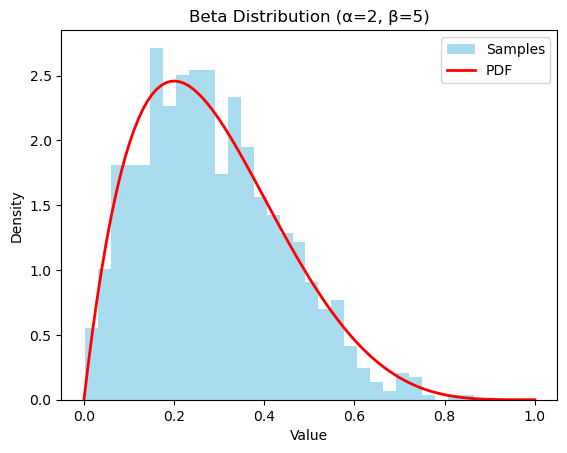

In [17]:
alpha = 2
beta = 5

sample_size = 1000
samples = stats.beta.rvs(alpha, beta, size=sample_size)
plt.hist(samples, bins=30, density=True, alpha=0.7, color='skyblue', label='Samples')
x = np.linspace(0,1,100)
pdf = stats.beta.pdf(x, alpha, beta)
plt.plot(x, pdf, 'r-', lw=2, label='PDF')
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Beta Distribution (α=2, β=5)')
plt.legend()
plt.show()

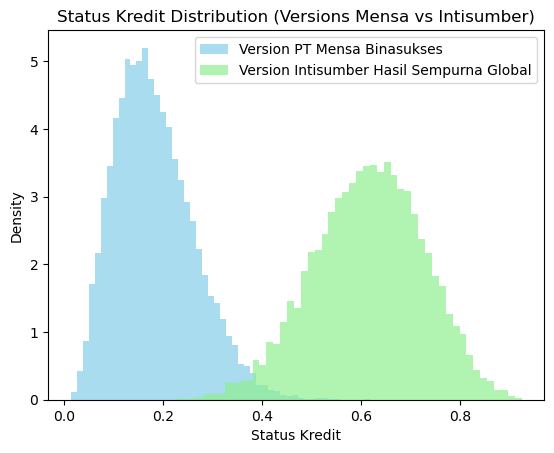

In [18]:
total_credit_mensa = 20
sudah_dibayar_mensa = 3

total_credit_inti = 16
sudah_dibayar_inti = 10

sudah_dibayar_rate_mensa = sudah_dibayar_mensa / total_credit_mensa
sudah_dibayar_rate_inti = sudah_dibayar_inti / total_credit_inti

alpha_mensa = sudah_dibayar_mensa + 1
beta_mensa = total_credit_mensa - sudah_dibayar_mensa + 1
alpha_inti = sudah_dibayar_inti + 1
beta_inti = total_credit_inti - sudah_dibayar_inti  + 1

sample_size_credit = 10000
samples_mensa = stats.beta.rvs(alpha_mensa, beta_mensa, size=sample_size_credit)
samples_inti = stats.beta.rvs(alpha_inti, beta_inti, size=sample_size_credit)

plt.hist(samples_mensa, bins=50, density=True, alpha=0.7, label='Version PT Mensa Binasukses', color='skyblue')
plt.hist(samples_inti, bins=50, density=True, alpha=0.7, label='Version Intisumber Hasil Sempurna Global', color='lightgreen')
plt.xlabel('Status Kredit')
plt.ylabel('Density')
plt.title('Status Kredit Distribution (Versions Mensa vs Intisumber)')
plt.legend()
plt.show()

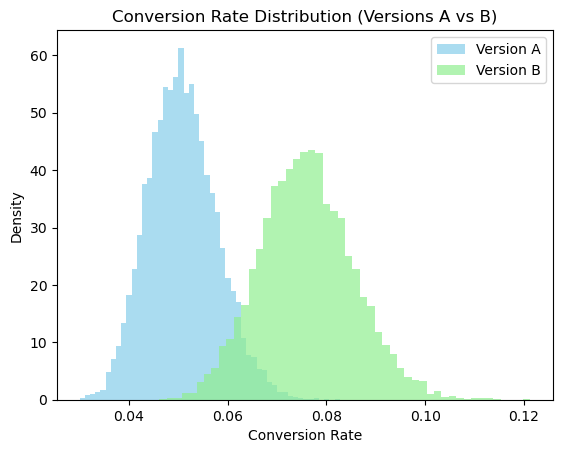

In [19]:
total_visitor_A = 1000
conversion_A = 50

total_visitor_B = 800
conversion_B = 60

conversion_rate_A = conversion_A / total_visitor_A
conversion_rate_B = conversion_B / total_visitor_B

alpha_A = conversion_A + 1
beta_A = total_visitor_A - conversion_A + 1
alpha_B = conversion_B + 1
beta_B = total_visitor_B - conversion_B + 1

sample_size_conversion = 10000
samples_A = stats.beta.rvs(alpha_A, beta_A, size=sample_size_conversion)
samples_B = stats.beta.rvs(alpha_B, beta_B, size=sample_size_conversion)

plt.hist(samples_A, bins=50, density=True, alpha=0.7, label='Version A', color='skyblue')
plt.hist(samples_B, bins=50, density=True, alpha=0.7, label='Version B', color='lightgreen')
plt.xlabel('Conversion Rate')
plt.ylabel('Density')
plt.title('Conversion Rate Distribution (Versions A vs B)')
plt.legend()
plt.show()

Binomial Distribution

- peraihan sales kedepannya dibandingkan dengan sales yang lain

In [20]:
#peraihan sales kedepannya dibandingkan dengan sales yang lain
p_iwan = .45
iwan = 227

p_wahyu = .55
wahyu = 30

p_mardi = .62
mardi = 66

p_herwan = .37
herwan = 91

p_adlan = .87
adlan = 11

k_iwan = 100
k_wahyu = 10
k_mardi = 40
k_herwan = 30
k_adlan = 5
k_mardi_herwan = 45

comb_iwan = sc.comb(iwan,k_iwan)
answer_iwan = comb_iwan * (p_iwan**k_iwan) * ((1-p_iwan)**(iwan-k_iwan))

comb_wahyu = sc.comb(wahyu,k_wahyu)
answer_wahyu = comb_wahyu * (p_wahyu**k_wahyu) * ((1-p_wahyu)**(wahyu-k_wahyu))

comb_mardi = sc.comb(mardi,k_mardi_herwan)
answer_mardi = comb_mardi * (p_mardi**k_mardi_herwan) * ((1-p_mardi)**(mardi-k_mardi_herwan))

comb_herwan = sc.comb(herwan,k_mardi_herwan)
answer_herwan = comb_herwan * (p_herwan**k_mardi_herwan) * ((1-p_herwan)**(herwan-k_mardi_herwan))

comb_adlan = sc.comb(adlan,k_adlan)
answer_adlan = comb_adlan * (p_adlan**k_adlan) * ((1-p_adlan)**(adlan-k_adlan))

print(' The probability of pak iwan making 100 in sales is %.2f%% ' %(answer_iwan*100))
print(' The probability of pak wahyu making 20 in sales is %.2f%% ' %(answer_wahyu*100))
print(' The probability of pak mardi making 45 in sales is %.2f%% ' %(answer_mardi*100))
print(' The probability of pak herwan making 45 in sales is %.2f%% ' %(answer_herwan*100))
print(' The probability of pak adlan making 15 in sales is %.2f%% ' %(answer_adlan*100))

 The probability of pak iwan making 100 in sales is 5.11% 
 The probability of pak wahyu making 20 in sales is 0.88% 
 The probability of pak mardi making 45 in sales is 6.06% 
 The probability of pak herwan making 45 in sales is 0.45% 
 The probability of pak adlan making 15 in sales is 0.11% 


In [21]:
mu_iwan = iwan * p_iwan
mu_wahyu = wahyu * p_wahyu
mu_mardi = mardi * p_mardi
mu_herwan = herwan * p_herwan
mu_adlan = adlan * p_adlan

sigma_iwan = (iwan*p_iwan*(1-p_iwan))**0.5
sigma_wahyu = (wahyu*p_wahyu*(1-p_wahyu))**0.5
sigma_mardi = (mardi*p_mardi*(1-p_mardi))**0.5
sigma_herwan = (herwan*p_herwan*(1-p_herwan))**0.5
sigma_adlan = (adlan*p_adlan*(1-p_adlan))**0.5

print('Iwan will make an average sales of %.2f +/- %.2f ' %(mu_iwan,sigma_iwan))
print('Wahyu will make an average sales of %.2f +/- %.2f ' %(mu_wahyu,sigma_wahyu))
print('Mardi will make an average sales of %.2f +/- %.2f ' %(mu_mardi,sigma_mardi))
print('Herwan will make an average sales of %.2f +/- %.2f ' %(mu_herwan,sigma_herwan))
print('Adlan will make an average sales of %.2f +/- %.2f ' %(mu_adlan,sigma_adlan))

Iwan will make an average sales of 102.15 +/- 7.50 
Wahyu will make an average sales of 16.50 +/- 2.72 
Mardi will make an average sales of 40.92 +/- 3.94 
Herwan will make an average sales of 33.67 +/- 4.61 
Adlan will make an average sales of 9.57 +/- 1.12 


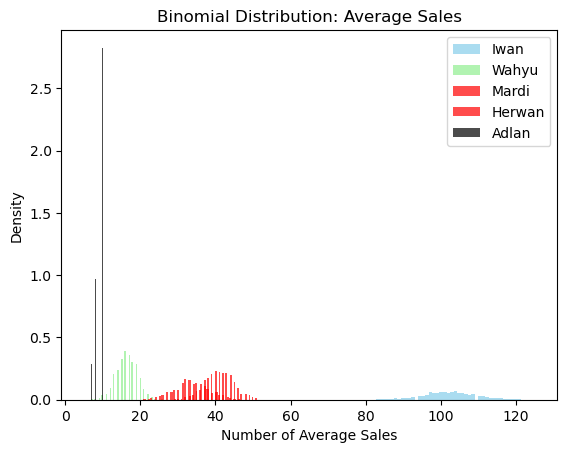

In [22]:
binomial_iwan = np.random.binomial(iwan, p_iwan, 1000)
binomial_wahyu = np.random.binomial(wahyu, p_wahyu, 1000)
binomial_mardi = np.random.binomial(mardi, p_mardi, 1000)
binomial_herwan = np.random.binomial(herwan, p_herwan, 1000)
binomial_adlan = np.random.binomial(adlan, p_adlan, 1000)

plt.hist(binomial_iwan, bins=50, alpha=0.7, density=True, label='Iwan', color='skyblue')
plt.hist(binomial_wahyu, bins=50, alpha=0.7, density=True, label='Wahyu', color='lightgreen')
plt.hist(binomial_mardi, bins=50, alpha=0.7, density=True, label='Mardi', color='red')
plt.hist(binomial_herwan, bins=50, alpha=0.7, density=True, label='Herwan', color='red')
plt.hist(binomial_adlan, bins=50, alpha=0.7, density=True, label='Adlan', color='black')
plt.xlabel('Number of Average Sales')
plt.ylabel('Density')
plt.title('Binomial Distribution: Average Sales')
plt.legend()
plt.show()

Chi-Square

In [23]:
data_chi = {'Age Group': ['18-30', '18-30', '31-45', '31-45', '46+', '46+', '18-30', '31-45', '46+', '46+'],
           'Shopping Mode': ['Online', 'In-store', 'Online', 'Both', 'Both', 'Online', 'In-store', 'Both', 'Both', 'In-store']}
data_chi = DataFrame(data_chi)
data_chi

,Age Group,Shopping Mode
0,18-30,Online
1,18-30,In-store
2,31-45,Online
3,31-45,Both
4,46+,Both
5,46+,Online
6,18-30,In-store
7,31-45,Both
8,46+,Both
9,46+,In-store


In [24]:
contingency_table = pd.crosstab(data_chi['Age Group'], data_chi['Shopping Mode'])
chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)
print(f"Chi-Square Statistic:", chi2)
print(f"P-value:", p_value)
print(f"Degrees of Freedom:", dof)

Chi-Square Statistic: 4.166666666666666
P-value: 0.383919620286046
Degrees of Freedom: 4


Continous Uniform Distribution
- probability average sales
- probability average debit & credit
- probability hutang, piutang, stock, saldo

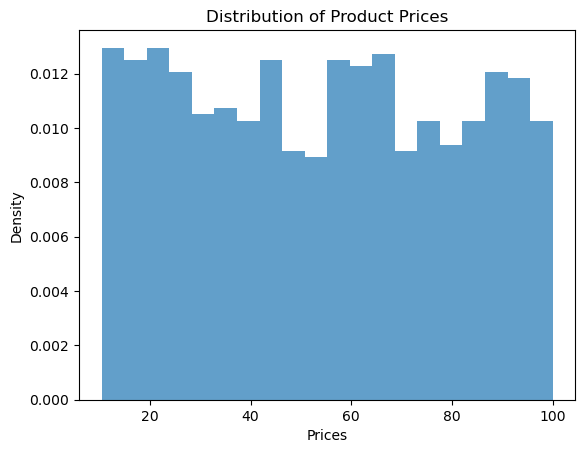

In [25]:
np.random.seed(42)
min_price = 10
max_price = 100
sample_size_cont = 1000
prices = np.random.uniform(min_price, max_price, sample_size_cont)

plt.hist(prices, bins=20, density=True, alpha=0.7)
plt.xlabel('Prices')
plt.ylabel('Density')
plt.title('Distribution of Product Prices')
plt.show()

In [26]:
fx_1 = 100/(max_price-min_price)
fx_2 = 50.0/(max_price-min_price)
ans = fx_1-fx_2

mean_price = np.mean(prices)
median_price = np.median(prices)
min_observed_price = np.min(prices)
max_observed_price = np.max(prices)
pdf_price = 1.0/(max_price-min_price)
print('The probability density function results in %1.3f' %pdf_price)
print('The probability that the product price will at least 50 is %2.1f%%' %(100*ans))
print('Mean Price:', mean_price)
print('Median Price:', median_price)
print('Minimum Observed Price:', min_observed_price)
print('Maximum Observed Price:', max_observed_price)

The probability density function results in 0.011
The probability that the product price will at least 50 is 55.6%
Mean Price: 54.123089798812025
Median Price: 54.712663889212976
Minimum Observed Price: 10.416882070414257
Maximum Observed Price: 99.97459059575175


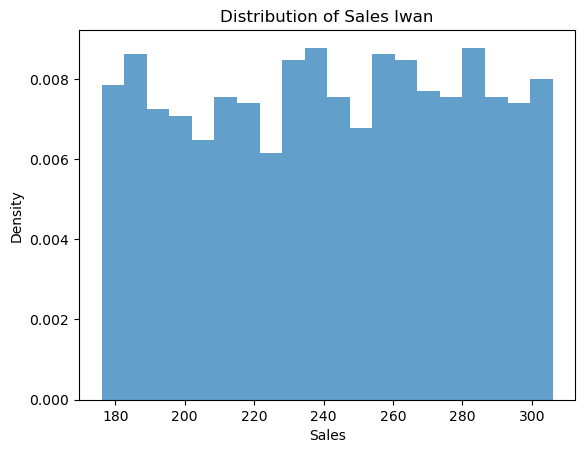

In [27]:
np.random.seed(40)
min_iwan = 176
max_iwan = 306
sample_size_cont = 1000
sales_iwan = np.random.uniform(min_iwan, max_iwan, sample_size_cont)

plt.hist(sales_iwan, bins=20, density=True, alpha=0.7)
plt.xlabel('Sales')
plt.ylabel('Density')
plt.title('Distribution of Sales Iwan')
plt.show()

In [28]:
fx_iwan1 = 300/(max_iwan-min_iwan)
fx_iwan2 = 250/(max_iwan-min_iwan)
ans_iwan = fx_iwan1-fx_iwan2
pdf_iwan = 1/(max_iwan-min_iwan)

print('The probability density function results in %1.3f' %pdf_iwan)
print('The probability that the sales will at least 250 is %2.1f%%' %(100*ans_iwan))

The probability density function results in 0.008
The probability that the sales will at least 250 is 38.5%


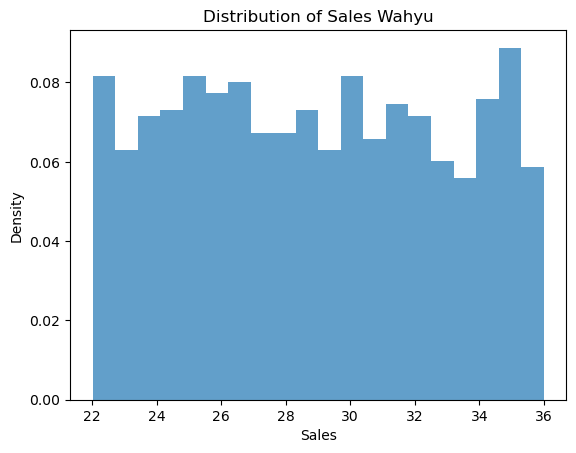

In [29]:
np.random.seed(50)
min_wahyu = 22
max_wahyu = 36
sample_size_cont = 1000
sales_wahyu = np.random.uniform(min_wahyu, max_wahyu, sample_size_cont)

plt.hist(sales_wahyu, bins=20, density=True, alpha=0.7)
plt.xlabel('Sales')
plt.ylabel('Density')
plt.title('Distribution of Sales Wahyu')
plt.show()

In [30]:
fx_wahyu1 = 36/(max_wahyu-min_wahyu)
fx_wahyu2 = 25/(max_wahyu-min_wahyu)
ans_wahyu = fx_wahyu1-fx_wahyu2
pdf_wahyu = 1/(max_wahyu-min_wahyu)

print('The probability density function results in %1.3f' %pdf_wahyu)
print('The probability that the sales will at least 25 is %2.1f%%' %(100*ans_wahyu))

The probability density function results in 0.071
The probability that the sales will at least 25 is 78.6%


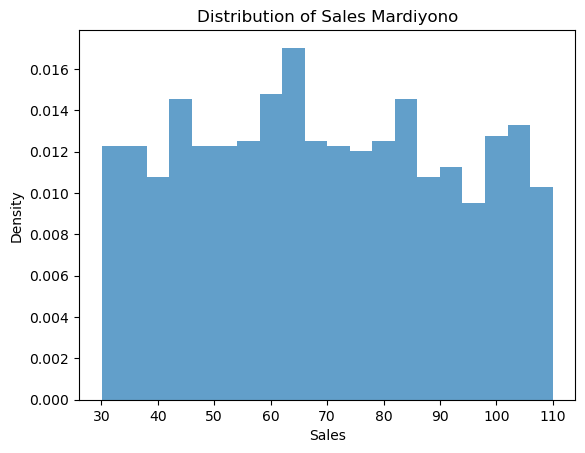

In [31]:
np.random.seed(57)
min_mardi = 30
max_mardi = 110
sample_size_cont = 1000
sales_mardi = np.random.uniform(min_mardi, max_mardi, sample_size_cont)

plt.hist(sales_mardi, bins=20, density=True, alpha=0.7)
plt.xlabel('Sales')
plt.ylabel('Density')
plt.title('Distribution of Sales Mardiyono')
plt.show()

In [32]:
fx_mardi1 = 110/(max_mardi-min_mardi)
fx_mardi2 = 90/(max_mardi-min_mardi)
ans_mardi = fx_mardi1-fx_mardi2
pdf_mardi = 1/(max_wahyu-min_wahyu)

print('The probability density function results in %1.3f' %pdf_mardi)
print('The probability that the sales will at least 90 is %2.1f%%' %(100*ans_mardi))

The probability density function results in 0.071
The probability that the sales will at least 90 is 25.0%


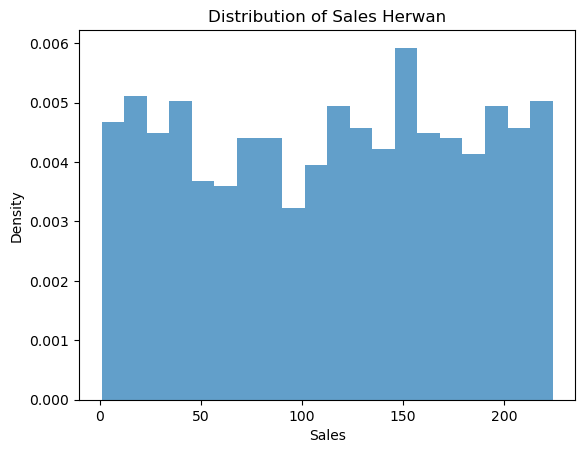

In [33]:
np.random.seed(63)
min_herwan = 1
max_herwan = 224
sample_size_cont = 1000
sales_herwan = np.random.uniform(min_herwan, max_herwan, sample_size_cont)

plt.hist(sales_herwan, bins=20, density=True, alpha=0.7)
plt.xlabel('Sales')
plt.ylabel('Density')
plt.title('Distribution of Sales Herwan')
plt.show()

In [34]:
fx_herwan1 = 224/(max_herwan-min_herwan)
fx_herwan2 = 175/(max_herwan-min_herwan)
ans_herwan = fx_herwan1-fx_herwan2
pdf_herwan = 1/(max_herwan-min_herwan)

print('The probability density function results in %1.3f' %pdf_herwan)
print('The probability that the sales will at least 175 is %2.1f%%' %(100*ans_herwan))

The probability density function results in 0.004
The probability that the sales will at least 175 is 22.0%


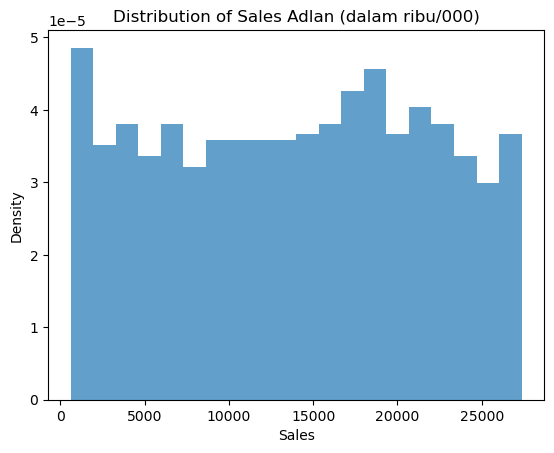

In [35]:
np.random.seed(79)
min_adlan = 580
max_adlan = 27400
sample_size_cont = 1000
sales_adlan = np.random.uniform(min_adlan, max_adlan, sample_size_cont)

plt.hist(sales_adlan, bins=20, density=True, alpha=0.7)
plt.xlabel('Sales')
plt.ylabel('Density')
plt.title("Distribution of Sales Adlan (dalam ribu/000)")
plt.show()

In [36]:
fx_adlan1 = 27400/(max_adlan-min_adlan)
fx_adlan2 = 25000/(max_adlan-min_adlan)
ans_adlan = fx_adlan1-fx_adlan2
pdf_adlan = 1/(max_adlan-min_adlan)

print('The probability density function results in %1.3f' %pdf_adlan)
print('The probability that the sales will at least 25000 is %2.1f%%' %(100*ans_adlan))

The probability density function results in 0.000
The probability that the sales will at least 25000 is 8.9%


Discrete Uniform Distribution

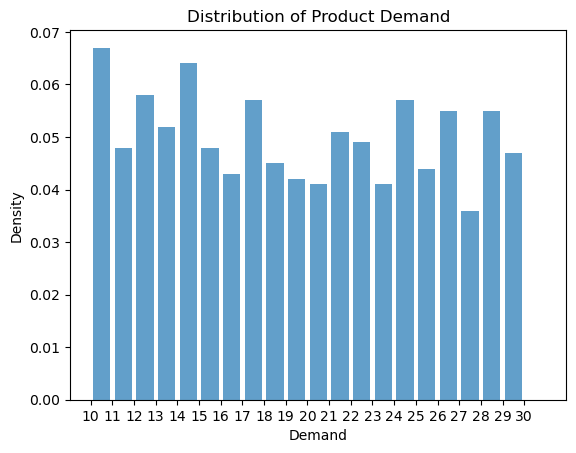

In [37]:
np.random.seed(42)
min_demand = 10
max_demand = 30
sample_size_disc = 1000
demand = np.random.randint(min_demand, max_demand, sample_size_disc)

plt.hist(demand, bins=range(min_demand, max_demand + 2), density=True, alpha=0.7, rwidth=0.8)
plt.xlabel('Demand')
plt.ylabel('Density')
plt.title('Distribution of Product Demand')
plt.xticks(range(min_demand, max_demand + 1))
plt.show()

In [38]:
mean_demand = np.mean(demand)
median_demand = np.median(demand)
min_obser_demand = np.min(demand)
max_obser_demand = np.max(demand)

print('Mean Demand:', mean_demand)
print('Median Demand:', median_demand)
print('Minimum Observed Demand:', min_obser_demand)
print('Maximum Observed Demand:', max_obser_demand)

Mean Demand: 19.136
Median Demand: 19.0
Minimum Observed Demand: 10
Maximum Observed Demand: 29


Bayesian A-B Testing

In [39]:
'''conversion_bayes_group_A = np.array([100, 120, 110, 130, 140])
conversion_bayes_group_B = np.array([90, 95, 100, 105, 110])

with pm.Model() as model:
    conversion_bayes_rate_A = pm.Beta('Conversion Rate A:', alpha=1, beta=1)
    conversion_bayes_rate_B = pm.Beta('Conversion Rate B:', alpha=1, beta=1)
    observed_bayes_A = pm.Binomial('observed_bayes_A:', n=len(conversion_bayes_group_A), p=conversion_bayes_rate_A, observed=conversion_bayes_group_A)
    observed_bayes_B = pm.Binomial('observed_bayes_B:', n=len(conversion_bayes_group_B), p=conversion_bayes_rate_B, observed=conversion_bayes_group_B)
    diff_bayes_conversion_rate = pm.Deterministic('diff_bayes_conversion_rate', conversion_bayes_rate_A - conversion_bayes_rate_B)
    trace = pm.sample(2000, tune=1000, cores=1)

pm.summary(trace)
pm.plot_posterior(trace, var_names=['diff_bayes_conversion_rate'])'''

"conversion_bayes_group_A = np.array([100, 120, 110, 130, 140])\nconversion_bayes_group_B = np.array([90, 95, 100, 105, 110])\n\nwith pm.Model() as model:\n    conversion_bayes_rate_A = pm.Beta('Conversion Rate A:', alpha=1, beta=1)\n    conversion_bayes_rate_B = pm.Beta('Conversion Rate B:', alpha=1, beta=1)\n    observed_bayes_A = pm.Binomial('observed_bayes_A:', n=len(conversion_bayes_group_A), p=conversion_bayes_rate_A, observed=conversion_bayes_group_A)\n    observed_bayes_B = pm.Binomial('observed_bayes_B:', n=len(conversion_bayes_group_B), p=conversion_bayes_rate_B, observed=conversion_bayes_group_B)\n    diff_bayes_conversion_rate = pm.Deterministic('diff_bayes_conversion_rate', conversion_bayes_rate_A - conversion_bayes_rate_B)\n    trace = pm.sample(2000, tune=1000, cores=1)\n\npm.summary(trace)\npm.plot_posterior(trace, var_names=['diff_bayes_conversion_rate'])"

Exponantial Distribution

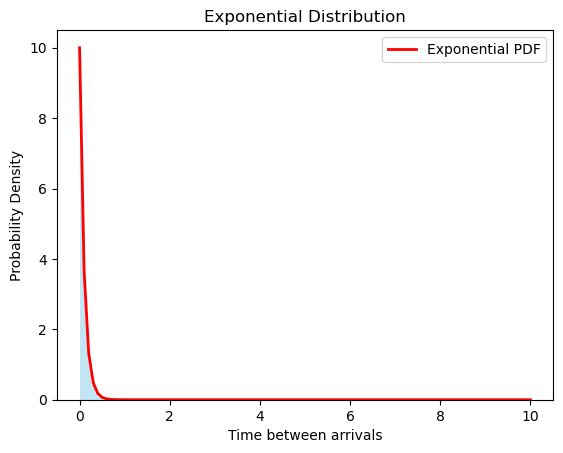

In [40]:
rate_expon = 10
expon_samples = stats.expon.rvs(scale=1/rate_expon, size=1000)
plt.hist(expon_samples, bins=30, density=True, alpha=0.5, color='skyblue')
x_expon = np.linspace(0,10,100)
pdf_expon = stats.expon.pdf(x_expon, scale=1/rate_expon)
plt.plot(x_expon, pdf_expon, 'r-', lw=2, label='Exponential PDF')
plt.xlabel('Time between arrivals')
plt.ylabel('Probability Density')
plt.title('Exponential Distribution')
plt.legend()
plt.show()

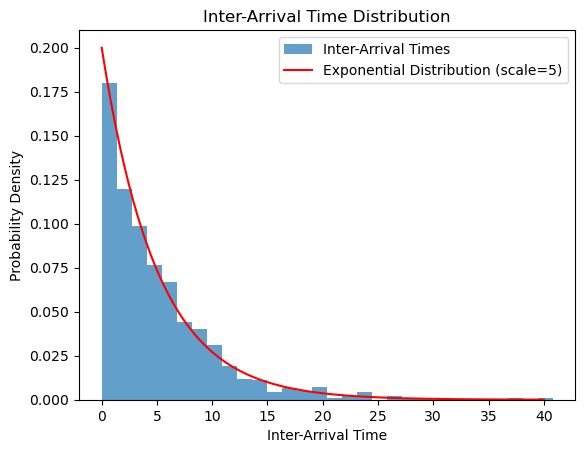

In [41]:
customer_arrival = np.random.exponential(scale=5, size=1000)  # Average inter-arrival time of 5 units

# Plot the histogram of inter-arrival times
plt.hist(customer_arrival, bins=30, density=True, alpha=0.7, label='Inter-Arrival Times')

# Plot the probability density function (PDF) of the exponential distribution
x_customer = np.linspace(0, 40, 100)
pdf_customer = stats.expon.pdf(x_customer, scale=5)  # PDF of exponential distribution with scale parameter 5
plt.plot(x_customer, pdf_customer, 'r-', label='Exponential Distribution (scale=5)')

plt.xlabel('Inter-Arrival Time')
plt.ylabel('Probability Density')
plt.title('Inter-Arrival Time Distribution')
plt.legend()
plt.show()

Frequentist A/B testing

Suppose you work for an e-commerce company and want to test whether displaying customer reviews on product pages has a significant impact on the conversion rate. Currently, some product pages show customer reviews (Group A), while others do not display any reviews (Group B).

To perform a frequentist A/B test in this scenario, you can follow these steps:

Random Assignment: Randomly assign website visitors to either Group A or Group B when they land on a product page. Ensure that the assignment is unbiased and that visitors have an equal chance of being assigned to either group.

Define the Hypotheses:

Null Hypothesis (H0): There is no difference in the conversion rates between product pages with and without customer reviews.
Alternative Hypothesis (HA): There is a statistically significant difference in the conversion rates between product pages with and without customer reviews.
Collect the Data:

Track the number of visitors and the number of conversions (e.g., purchases) for each product page variant (Group A and Group B) over a specified period.
Analyze the Data:

Calculate the conversion rates for Group A and Group B.
Perform a hypothesis test, such as a two-sample t-test or chi-square test, to compare the conversion rates between the two groups.
Calculate the p-value, which represents the probability of observing the data or more extreme results if the null hypothesis is true.
Compare the p-value to the chosen significance level (α) to determine statistical significance.
Make a Decision:

If the p-value is less than the significance level (α), reject the null hypothesis and conclude that there is a statistically significant difference in conversion rates between product pages with and without customer reviews.
If the p-value is greater than the significance level (α), fail to reject the null hypothesis and conclude that there is insufficient evidence to support a significant difference.
Draw Conclusions:

Based on the analysis, interpret the results and make decisions about whether to implement customer reviews on all product pages based on their impact on the conversion rate.
Remember to consider factors such as sample size, randomization, potential biases, and statistical power to ensure the validity and reliability of the A/B test results.

Please note that the code implementation for A/B testing can vary depending on the programming language and libraries used for analysis.

Gamma Distribution

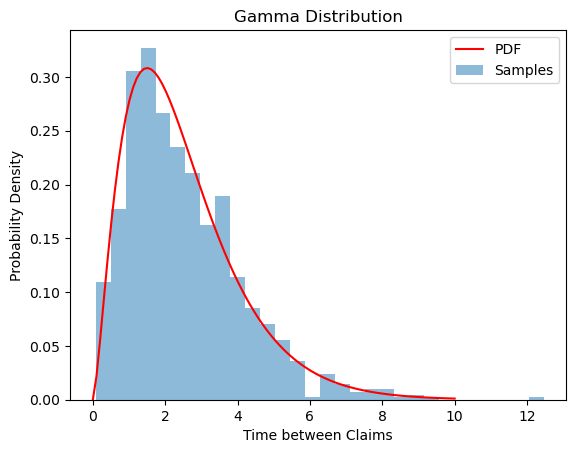

In [42]:
shape_gamma = 2.5
scale_gamma = 1

samples_gamma = stats.gamma.rvs(shape_gamma, scale = scale_gamma, size=1000)
x_gamma = np.linspace(0,10,100)
pdf_gamma = stats.gamma.pdf(x_gamma, shape_gamma, scale= scale_gamma)
plt.plot(x_gamma, pdf_gamma, 'r-', label='PDF')
plt.hist(samples_gamma, bins=30, density=True, alpha=0.5, label='Samples' )
plt.xlabel('Time between Claims')
plt.ylabel('Probability Density')
plt.title('Gamma Distribution')
plt.legend()
plt.show()

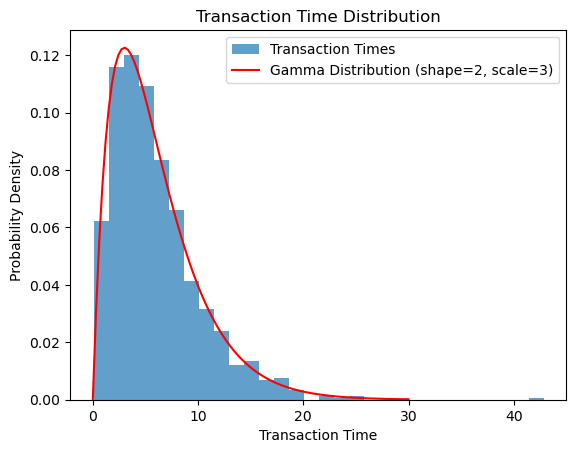

In [43]:
transaction_times = np.random.gamma(shape=2, scale=3, size=1000)  # Shape=2, Scale=3

# Plot the histogram of transaction times
plt.hist(transaction_times, bins=30, density=True, alpha=0.7, label='Transaction Times')

# Plot the probability density function (PDF) of the gamma distribution
x = np.linspace(0, 30, 100)
pdf = stats.gamma.pdf(x, a=2, scale=3)  # PDF of gamma distribution with shape=2 and scale=3
plt.plot(x, pdf, 'r-', label='Gamma Distribution (shape=2, scale=3)')

plt.xlabel('Transaction Time')
plt.ylabel('Probability Density')
plt.title('Transaction Time Distribution')
plt.legend()
plt.show()

Hypothesis Testing and Confidence Intervals

In [44]:
conversion_rate_before = [0.1, 0.12, 0.09, 0.11, 0.13]
conversion_rate_after = [0.14, 0.16, 0.18, 0.12, 0.15]

t_stats_hyp, p_value_hyp = stats.ttest_ind(conversion_rate_before, conversion_rate_after)
mean_diff_hyp = np.mean(conversion_rate_after) - np.mean(conversion_rate_before)
std_error_hyp = np.sqrt(np.var(conversion_rate_before)/len(conversion_rate_before) + np.var(conversion_rate_after)/len(conversion_rate_after))
margin_of_error_hyp = stats.norm.ppf(0.975) * std_error_hyp
confidence_interval_hyp = (mean_diff_hyp - margin_of_error_hyp, mean_diff_hyp + margin_of_error_hyp)
print('Hypothesis Testing')
print("t-statistic: %.2f" %t_stats_hyp)
print("p-value: %.2f" %p_value_hyp)
print('Confidence Interval')
print("Before: %.2f, %.2f" %(np.mean(conversion_rate_before) - margin_of_error_hyp, np.mean(conversion_rate_before) + margin_of_error_hyp))
print("After: %.2f, %.2f" %(np.mean(conversion_rate_after) - margin_of_error_hyp, np.mean(conversion_rate_after) + margin_of_error_hyp))

Hypothesis Testing
t-statistic: -3.27
p-value: 0.01
Confidence Interval
Before: 0.09, 0.13
After: 0.13, 0.17


Kolmogorov-Smirnov Test

In [45]:
data_kol = np.random.normal(loc=0, scale=1, size=100)
kstest_result = stats.kstest(data_kol, 'norm')
d_statistic_kol = kstest_result.statistic
p_value_kol = kstest_result.pvalue
print("Kolmogorov-Smirnov")
print("D-Statistic: %.2f" %d_statistic_kol)
print("p-value: %.2f" %p_value_kol)

Kolmogorov-Smirnov
D-Statistic: 0.07
p-value: 0.67


In [46]:
delivery_times = [2, 3, 4, 5, 2, 3, 4, 5, 6, 2, 3, 4, 5, 6]
kstest_kol2 = stats.kstest(delivery_times, 'norm')
d_statistic_kol2 = kstest_kol2.statistic
p_value_kol2 = kstest_kol2.pvalue
significance_level = 0.05

if p_value_kol2 < significance_level:
    conclusion = "Reject null hypothesis. The delivery times do not follow the target distribution."
else:
    conclusion = "Fail to reject null hypothesis. The delivery times follow the target distribution."
    
print("Kolmogorov-Smirnov Test Result")
print("D-Statistic: %.2f" %d_statistic_kol2)
print("p-value: %.2f" %p_value_kol2)
print("Conclusion: ", conclusion)

Kolmogorov-Smirnov Test Result
D-Statistic: 0.98
p-value: 0.00
Conclusion:  Reject null hypothesis. The delivery times do not follow the target distribution.


Markov Chain Monte Carlo Algorithm

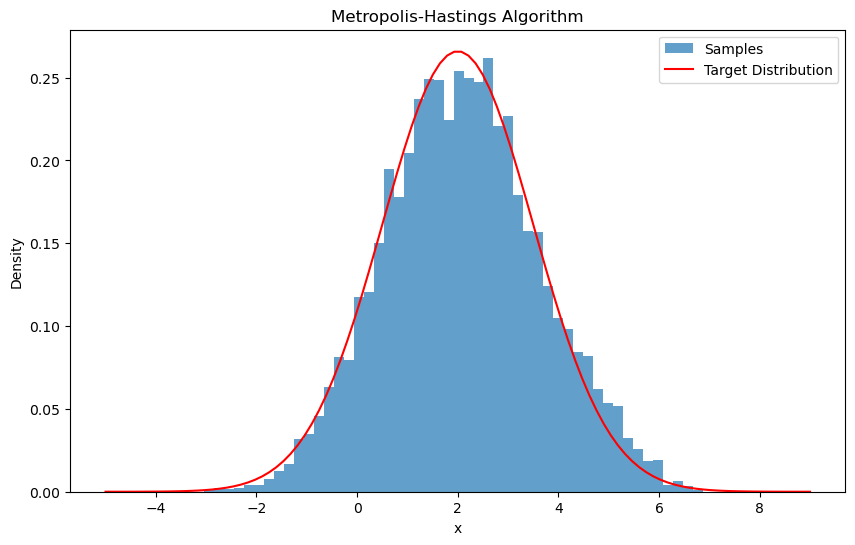

In [47]:
def target_distribution(x_kov, mu_kov, sigma_kov):
    return np.exp(-0.5 * ((x_kov - mu_kov) / sigma_kov)**2) / (sigma_kov * np.sqrt(2 * np.pi))

def metropolis_hastings(iterations_kov, initial_value_kov, mu_kov, sigma_kov):
    samples_kov = [initial_value_kov]
    current_value_kov = initial_value_kov
    
    for _ in range(iterations_kov):
        proposal_kov = np.random.normal(current_value_kov, 0.5)
        acceptance_kov = min(1, target_distribution(proposal_kov, mu_kov, sigma_kov) / target_distribution(current_value_kov, mu_kov, sigma_kov))
        
        if np.random.rand() < acceptance_kov:
            current_value_kov = proposal_kov
        samples_kov.append(current_value_kov)
        
    return samples_kov

mu_kov = 2
sigma_kov = 1.5
iterations_kov = 10000
initial_value_kov = 0
samples_kov = metropolis_hastings(iterations_kov, initial_value_kov, mu_kov, sigma_kov)

plt.figure(figsize=(10,6))
plt.hist(samples_kov, bins= 50, density=True, alpha=0.7, label='Samples')
x_kov = np.linspace(-5,9,100)
plt.plot(x_kov, target_distribution(x_kov, mu_kov, sigma_kov, ), 'r-', label='Target Distribution')
plt.xlabel('x')
plt.ylabel('Density')
plt.title('Metropolis-Hastings Algorithm')
plt.legend()
plt.show()

Normal Distribution

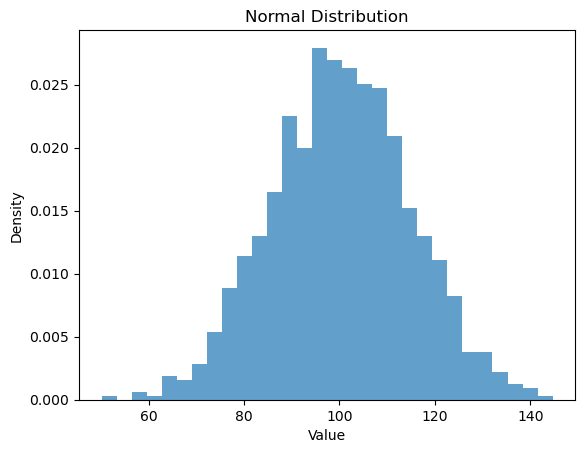

In [48]:
mean_nor = 100
std_dev_nor = 15
num_samples_nor = 1000

data_nor = np.random.normal(mean_nor, std_dev_nor, num_samples_nor)
plt.hist(data_nor, bins=30, density=True, alpha=0.7)
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Normal Distribution')
plt.show()

Sampling Techniques

In [49]:
data_samp = {'region': [31,10,15,21,38,37,33,29,81,42,11],
             'city': [61,10,15,55,89,37,33,29,52,42,60]}
df_samp = DataFrame(data_samp)
df_samp

,region,city
0,31,61
1,10,10
2,15,15
3,21,55
4,38,89
5,37,37
6,33,33
7,29,29
8,81,52
9,42,42


In [50]:
'''samp_size = 100
random_samp = df_samp.sample(n=samp_size)

strata_column = df_samp['region']
strata_size = [50,30,20]
stratified_samp = df_samp.groupby(strata_column, group_keys=False).apply(lambda x: x.sample(n=strata_size[x.name]))

cluster_column = df_samp['city']
clusters = df_samp[cluster_column].unique()
cluster_samp = DataFrame
for cluster in clusters:
    cluster_data_samp = df_samp.loc[df_samp[cluster_column] == cluster]
    cluster_samp = cluster_samp.append(cluster_data_samp.sample(n=1))

print('Simple Random Sample')
print(random_samp.head())
print('Strata Random Sample')
print(stratified_samp.head())
print('Cluster Random Sample')
print(cluster_samp.head())'''

"samp_size = 100\nrandom_samp = df_samp.sample(n=samp_size)\n\nstrata_column = df_samp['region']\nstrata_size = [50,30,20]\nstratified_samp = df_samp.groupby(strata_column, group_keys=False).apply(lambda x: x.sample(n=strata_size[x.name]))\n\ncluster_column = df_samp['city']\nclusters = df_samp[cluster_column].unique()\ncluster_samp = DataFrame\nfor cluster in clusters:\n    cluster_data_samp = df_samp.loc[df_samp[cluster_column] == cluster]\n    cluster_samp = cluster_samp.append(cluster_data_samp.sample(n=1))\n\nprint('Simple Random Sample')\nprint(random_samp.head())\nprint('Strata Random Sample')\nprint(stratified_samp.head())\nprint('Cluster Random Sample')\nprint(cluster_samp.head())"

In [51]:
total_debit_credit = total_debit_credit.set_index('Date')
total_debit_credit
#total_debit_credit.replace(np.nan,0)
#total_debit_credit.drop(["2023-05-24","2023-05-26","2023-05-27"])

,Debit,Credit
Date,,
2023-05-02,5.920772e+07,4.102612e+08
2023-05-03,9.265000e+06,2.542550e+07
2023-05-04,3.150020e+07,4.361693e+07
2023-05-05,1.428500e+06,2.020470e+07
2023-05-06,4.608030e+07,4.971500e+06
2023-05-08,6.675464e+07,5.191140e+07
2023-05-09,2.132750e+07,2.809800e+07
2023-05-10,2.484460e+07,1.108892e+08
2023-05-11,3.712000e+06,3.259000e+07


In [52]:
total_debit_credit.drop(["2023-05-24","2023-05-26","2023-05-27"])

,Debit,Credit
Date,,
2023-05-02,5.920772e+07,4.102612e+08
2023-05-03,9.265000e+06,2.542550e+07
2023-05-04,3.150020e+07,4.361693e+07
2023-05-05,1.428500e+06,2.020470e+07
2023-05-06,4.608030e+07,4.971500e+06
2023-05-08,6.675464e+07,5.191140e+07
2023-05-09,2.132750e+07,2.809800e+07
2023-05-10,2.484460e+07,1.108892e+08
2023-05-11,3.712000e+06,3.259000e+07


In [53]:
'''debit_card_data = total_debit_credit['Debit']
credit_card_data = total_debit_credit['Credit']

transaction_volume_debit = len(debit_card_data)
transaction_volume_credit = len(credit_card_data)

transaction_value_debit = debit_card_data.sum()
transaction_value_credit = credit_card_data.sum()

t_statistic, p_value = stats.ttest_ind(debit_card_data, credit_card_data)
u_statistic, p_value_mw = stats.mannwhitneyu(debit_card_data, credit_card_data)

print("Transaction Volume - Debit Card: ", transaction_volume_debit)
print("Transaction Volume - Credit Card: ", transaction_volume_credit)
print("Transaction Value - Debit Card: ", transaction_value_debit)
print("Transaction Value - Credit Card: ", transaction_value_credit)
print('t-statistic: ', t_statistic)
print('p-value: ', p_value)
print("Mann-Whitney U statistic: ", u_statistic)
print("p-value_mw: ", p_value_mw)'''

'debit_card_data = total_debit_credit[\'Debit\']\ncredit_card_data = total_debit_credit[\'Credit\']\n\ntransaction_volume_debit = len(debit_card_data)\ntransaction_volume_credit = len(credit_card_data)\n\ntransaction_value_debit = debit_card_data.sum()\ntransaction_value_credit = credit_card_data.sum()\n\nt_statistic, p_value = stats.ttest_ind(debit_card_data, credit_card_data)\nu_statistic, p_value_mw = stats.mannwhitneyu(debit_card_data, credit_card_data)\n\nprint("Transaction Volume - Debit Card: ", transaction_volume_debit)\nprint("Transaction Volume - Credit Card: ", transaction_volume_credit)\nprint("Transaction Value - Debit Card: ", transaction_value_debit)\nprint("Transaction Value - Credit Card: ", transaction_value_credit)\nprint(\'t-statistic: \', t_statistic)\nprint(\'p-value: \', p_value)\nprint("Mann-Whitney U statistic: ", u_statistic)\nprint("p-value_mw: ", p_value_mw)'

In [54]:
'''transaction_volume = total_debit_credit.count()
transaction_value = total_debit_credit.sum()
frequency_of_use = total_debit_credit.nunique()

# Plot the comparison metrics
labels = ['Debit', 'Credit']
x = [transaction_volume, transaction_value]

plt.bar(labels, x)
#plt.bar(x, transaction_value, label='Transaction Value', alpha=0.7)
#plt.bar(x, frequency_of_use, label='Frequency of Use', alpha=0.7)

plt.xlabel('Payment Type')
plt.ylabel('Metrics')
plt.title('Comparison of Payment Methods')
#plt.xticks(x, labels)
#plt.legend()
plt.show()'''

"transaction_volume = total_debit_credit.count()\ntransaction_value = total_debit_credit.sum()\nfrequency_of_use = total_debit_credit.nunique()\n\n# Plot the comparison metrics\nlabels = ['Debit', 'Credit']\nx = [transaction_volume, transaction_value]\n\nplt.bar(labels, x)\n#plt.bar(x, transaction_value, label='Transaction Value', alpha=0.7)\n#plt.bar(x, frequency_of_use, label='Frequency of Use', alpha=0.7)\n\nplt.xlabel('Payment Type')\nplt.ylabel('Metrics')\nplt.title('Comparison of Payment Methods')\n#plt.xticks(x, labels)\n#plt.legend()\nplt.show()"

In [55]:
rekap_xlsx = pd.read_excel('laporan_mei_2023(4)_edit.xlsx',sheet_name='rekap')
rekap_xlsx

,Unnamed: 0,Saldo Akhir Buku,Piutang,Stock Gudang,Hutang
0,2023-04-29,4.553961e+07,2.083755e+09,5.477101e+08,1.572597e+09
1,2023-05-02,7.054432e+07,2.529391e+09,5.448049e+08,1.948656e+09
2,2023-05-03,5.438382e+07,2.523453e+09,5.421333e+08,1.948656e+09
3,2023-05-04,2.819710e+07,2.534601e+09,5.404154e+08,1.934586e+09
4,2023-05-05,2.554140e+07,2.544171e+09,5.328979e+08,1.950706e+09
5,2023-05-06,6.665020e+07,2.508345e+09,5.296257e+08,1.950706e+09
6,2023-05-08,3.630542e+07,2.634360e+09,5.262490e+08,1.907518e+09
7,2023-05-09,5.745992e+07,2.640621e+09,5.439398e+08,1.935443e+09
8,2023-05-10,6.467215e+07,2.637266e+09,5.631082e+08,2.028700e+09
9,2023-05-11,6.483215e+07,2.626062e+09,5.568374e+08,2.051152e+09


In [56]:
rekap_xlsx = rekap_xlsx.rename(columns={'Unnamed: 0': 'Date'})
rekap_xlsx

,Date,Saldo Akhir Buku,Piutang,Stock Gudang,Hutang
0,2023-04-29,4.553961e+07,2.083755e+09,5.477101e+08,1.572597e+09
1,2023-05-02,7.054432e+07,2.529391e+09,5.448049e+08,1.948656e+09
2,2023-05-03,5.438382e+07,2.523453e+09,5.421333e+08,1.948656e+09
3,2023-05-04,2.819710e+07,2.534601e+09,5.404154e+08,1.934586e+09
4,2023-05-05,2.554140e+07,2.544171e+09,5.328979e+08,1.950706e+09
5,2023-05-06,6.665020e+07,2.508345e+09,5.296257e+08,1.950706e+09
6,2023-05-08,3.630542e+07,2.634360e+09,5.262490e+08,1.907518e+09
7,2023-05-09,5.745992e+07,2.640621e+09,5.439398e+08,1.935443e+09
8,2023-05-10,6.467215e+07,2.637266e+09,5.631082e+08,2.028700e+09
9,2023-05-11,6.483215e+07,2.626062e+09,5.568374e+08,2.051152e+09


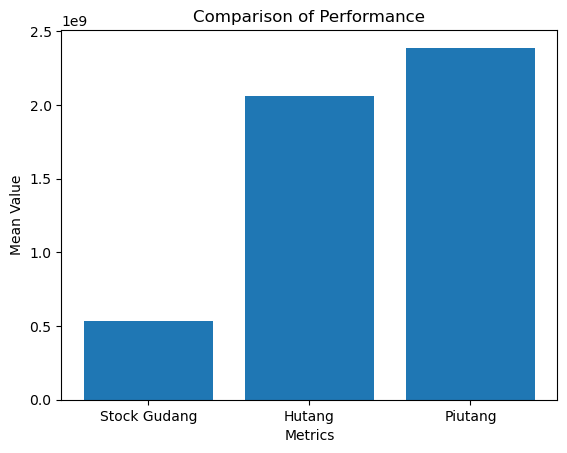

Inventory Mean:  535723341.7302547
Debt Mean:  2058506062.656923
Receivables Mean:  2387947836.978077
Inventory Standard Deviation:  20861636.42109689
Debt Standard Deviation:  151384404.25636613
Receivables Standard Deviation:  394130544.8099993
f-statistic:  426.1860378800264
p-value:  1.1034987049196444e-41


In [57]:
inventory_data = rekap_xlsx['Stock Gudang ']
debt_data = rekap_xlsx['Hutang']
receivables_data = rekap_xlsx['Piutang']

# Perform statistical tests
inventory_mean = inventory_data.mean()
debt_mean = debt_data.mean()
receivables_mean = receivables_data.mean()

inventory_std = inventory_data.std()
debt_std = debt_data.std()
receivables_std = receivables_data.std()

f_statistic, p_value = stats.f_oneway(inventory_data, debt_data, receivables_data)

metrics = ['Stock Gudang', 'Hutang', 'Piutang']
values = [inventory_mean, debt_mean, receivables_mean]

plt.bar(metrics, values)
plt.xlabel('Metrics')
plt.ylabel('Mean Value')
plt.title('Comparison of Performance')
plt.show()

print("Inventory Mean: ", inventory_mean)
print("Debt Mean: ", debt_mean)
print("Receivables Mean: ", receivables_mean)
print("Inventory Standard Deviation: ", inventory_std)
print("Debt Standard Deviation: ", debt_std)
print("Receivables Standard Deviation: ", receivables_std)
print("f-statistic: ", f_statistic)
print("p-value: ", p_value)

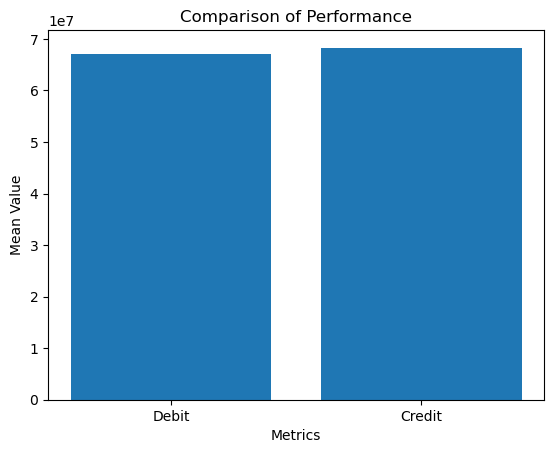

Debit Mean:  67149441.04166667
Credit Mean:  68287083.13113984
Debit Standard Deviation:  205271547.92217794
Credit Standard Deviation:  108000418.75152215
f-statistic:  nan
p-value:  nan


In [58]:
debit_data = total_debit_credit['Debit']
credit_data = total_debit_credit['Credit']

# Perform statistical tests
debit_mean = debit_data.mean()
credit_mean = credit_data.mean()

debit_std = debit_data.std()
credit_std = credit_data.std()

f_statistic2, p_value2 = stats.f_oneway(debit_data, credit_data)

metrics = ['Debit', 'Credit']
values = [debit_mean, credit_mean]

plt.bar(metrics, values)
plt.xlabel('Metrics')
plt.ylabel('Mean Value')
plt.title('Comparison of Performance')
plt.show()

print("Debit Mean: ", debit_mean)
print("Credit Mean: ", credit_mean)
print("Debit Standard Deviation: ", debit_std)
print("Credit Standard Deviation: ", credit_std)
print("f-statistic: ", f_statistic2)
print("p-value: ", p_value2)